In [11]:
from warnings import filterwarnings
filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
df_spiral = pd.read_csv("NewSpiral.csv")
df_spiral

,_ID_EXAM,IMAGE_NAME,ID_PATIENT,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ET_HT,MIN_BETWEEN_ET_HT,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT
0,H1,sp1-H1.jpg,59,1,M,R,58,14900.772670,13207.241210,40856.39894,0.087041,56.978320,192.737170,0.026662,4394.307090,0.120773
1,H2,sp1-H2.jpg,76,1,M,R,60,6076.106534,9440.754502,36137.73814,0.065872,39.597318,169.753376,0.266595,2031.447046,0.172414
2,H3,sp1-H3.jpg,301,1,F,R,56,12220.462340,12247.263300,39871.73569,0.000000,46.183810,192.536776,0.007857,3843.754479,0.123894
3,H4,sp1-H4.jpg,102,1,M,R,24,4810.072073,4904.029458,32262.38975,0.044374,31.485790,200.401229,0.114530,1586.941716,0.162011
4,H5,sp1-H5.jpg,305,1,M,R,79,5458.875925,5911.591981,31795.46792,0.040906,47.231442,134.897863,0.026703,2251.866128,0.202899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,P28,mea4-P28.jpg,176,2,F,R,63,4989.388643,6494.479549,35465.93588,0.592189,29.318362,179.071929,0.059952,2001.042984,0.156716
260,P29,mea4-P29.jpg,181,2,F,R,62,4921.267695,6948.380564,35304.08954,0.017636,25.699685,182.482156,0.055527,1698.122391,0.235915
261,P30,mea4-P30.jpg,230,2,M,R,52,3948.471135,6460.337471,39190.24445,0.017617,19.194724,178.322855,0.008603,1493.908219,0.147799
262,P31,mea4-P31.jpg,138,2,F,R,53,5506.425873,6590.997352,38287.04673,0.045529,25.746149,178.432113,0.027945,1656.033806,0.204013


In [3]:
df_meander = pd.read_csv("NewMeander.csv")
df_meander

,_ID_EXAM,IMAGE_NAME,ID_PATIENT,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ET_HT,MIN_BETWEEN_ET_HT,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT
0,H1,mea1-H1.jpg,59,1,M,R,58,7434.180108,10120.222430,42913.38070,0.071112,48.761320,203.049894,0.119590,2236.376294,0.114428
1,H2,mea1-H2.jpg,76,1,M,R,60,10132.444470,11923.713750,64317.66969,0.581945,31.231012,212.489845,0.029351,1658.672664,0.064394
2,H3,mea1-H3.jpg,301,1,F,R,56,5320.969169,8443.270014,39979.95076,0.000388,54.281633,227.843584,0.757457,3148.250320,0.158879
3,H4,mea1-H4.jpg,102,1,M,R,24,8659.652924,13558.029200,69319.27081,0.008113,52.104352,185.538482,0.220402,2606.647576,0.127358
4,H5,mea1-H5.jpg,305,1,M,R,79,7293.018199,7531.636413,34595.02260,0.102315,40.991308,198.680893,0.071312,3193.983137,0.155660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,P28,mea4-P28.jpg,176,2,F,R,63,4649.013546,7210.680410,45049.68241,0.032364,19.834001,214.707643,0.191509,671.570304,0.126623
260,P29,mea4-P29.jpg,181,2,F,R,62,5606.216748,6911.437880,33526.40980,0.000000,19.501336,133.597316,0.000000,580.637851,0.179402
261,P30,mea4-P30.jpg,230,2,M,R,52,4433.787806,6608.087204,42560.10992,2.717939,20.960257,174.983694,0.000000,645.048946,0.193038
262,P31,mea4-P31.jpg,138,2,F,R,53,3572.255813,6348.101783,57076.62706,0.002953,18.403387,188.995541,0.337134,571.027427,0.101695


In [4]:
df_spiral_attr = df_spiral.iloc[:, 3:]
df_spiral_attr["GENDER"] = df_spiral_attr["GENDER"].apply(lambda c: 1 if c=='M' else 0)
df_spiral_attr["RIGH/LEFT-HANDED"] = df_spiral_attr["RIGH/LEFT-HANDED"].apply(lambda c: 1 if c=='R' else 0)
df_spiral_attr["CLASS_TYPE"] = df_spiral_attr["CLASS_TYPE"].apply(lambda c: 0 if c == 1 else 1)
df_spiral_attr

,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ET_HT,MIN_BETWEEN_ET_HT,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT
0,0,1,1,58,14900.772670,13207.241210,40856.39894,0.087041,56.978320,192.737170,0.026662,4394.307090,0.120773
1,0,1,1,60,6076.106534,9440.754502,36137.73814,0.065872,39.597318,169.753376,0.266595,2031.447046,0.172414
2,0,0,1,56,12220.462340,12247.263300,39871.73569,0.000000,46.183810,192.536776,0.007857,3843.754479,0.123894
3,0,1,1,24,4810.072073,4904.029458,32262.38975,0.044374,31.485790,200.401229,0.114530,1586.941716,0.162011
4,0,1,1,79,5458.875925,5911.591981,31795.46792,0.040906,47.231442,134.897863,0.026703,2251.866128,0.202899
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,1,0,1,63,4989.388643,6494.479549,35465.93588,0.592189,29.318362,179.071929,0.059952,2001.042984,0.156716
260,1,0,1,62,4921.267695,6948.380564,35304.08954,0.017636,25.699685,182.482156,0.055527,1698.122391,0.235915
261,1,1,1,52,3948.471135,6460.337471,39190.24445,0.017617,19.194724,178.322855,0.008603,1493.908219,0.147799
262,1,0,1,53,5506.425873,6590.997352,38287.04673,0.045529,25.746149,178.432113,0.027945,1656.033806,0.204013


In [5]:
df_meander_attr = df_meander.iloc[:, 3:]
df_meander_attr["GENDER"] = df_meander_attr["GENDER"].apply(lambda c: 1 if c=='M' else 0)
df_meander_attr["RIGH/LEFT-HANDED"] = df_meander_attr["RIGH/LEFT-HANDED"].apply(lambda c: 1 if c=='R' else 0)
df_meander_attr["CLASS_TYPE"] = df_meander_attr["CLASS_TYPE"].apply(lambda c: 0 if c == 1 else 1)
df_meander_attr

,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ET_HT,MIN_BETWEEN_ET_HT,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT
0,0,1,1,58,7434.180108,10120.222430,42913.38070,0.071112,48.761320,203.049894,0.119590,2236.376294,0.114428
1,0,1,1,60,10132.444470,11923.713750,64317.66969,0.581945,31.231012,212.489845,0.029351,1658.672664,0.064394
2,0,0,1,56,5320.969169,8443.270014,39979.95076,0.000388,54.281633,227.843584,0.757457,3148.250320,0.158879
3,0,1,1,24,8659.652924,13558.029200,69319.27081,0.008113,52.104352,185.538482,0.220402,2606.647576,0.127358
4,0,1,1,79,7293.018199,7531.636413,34595.02260,0.102315,40.991308,198.680893,0.071312,3193.983137,0.155660
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,1,0,1,63,4649.013546,7210.680410,45049.68241,0.032364,19.834001,214.707643,0.191509,671.570304,0.126623
260,1,0,1,62,5606.216748,6911.437880,33526.40980,0.000000,19.501336,133.597316,0.000000,580.637851,0.179402
261,1,1,1,52,4433.787806,6608.087204,42560.10992,2.717939,20.960257,174.983694,0.000000,645.048946,0.193038
262,1,0,1,53,3572.255813,6348.101783,57076.62706,0.002953,18.403387,188.995541,0.337134,571.027427,0.101695


In [6]:
correlations = df_spiral_attr.corr()
target_corr = correlations['CLASS_TYPE']
target_corr

CLASS_TYPE                                         1.000000
GENDER                                             0.137443
RIGH/LEFT-HANDED                                   0.028383
AGE                                                0.494043
RMS                                               -0.401296
MAX_BETWEEN_ET_HT                                 -0.107477
MIN_BETWEEN_ET_HT                                 -0.015320
STD_DEVIATION_ET_HT                                0.036298
MRT                                               -0.399130
MAX_HT                                            -0.180950
MIN_HT                                            -0.130096
STD_HT                                            -0.442354
CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT    0.192225
Name: CLASS_TYPE, dtype: float64

In [7]:
correlations = df_meander_attr.corr()
target_corr = correlations['CLASS_TYPE']
target_corr

CLASS_TYPE                                         1.000000
GENDER                                             0.137443
RIGH/LEFT-HANDED                                   0.028383
AGE                                                0.494043
RMS                                               -0.311720
MAX_BETWEEN_ET_HT                                 -0.351144
MIN_BETWEEN_ET_HT                                 -0.162266
STD_DEVIATION_ET_HT                                0.008170
MRT                                               -0.484807
MAX_HT                                            -0.037963
MIN_HT                                            -0.203706
STD_HT                                            -0.474113
CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT    0.173975
Name: CLASS_TYPE, dtype: float64

In [19]:
datasets = []

X = np.array(df_spiral_attr.iloc[:, 1:])
y = np.array(df_spiral_attr.iloc[:, :1]).astype('int')

datasets.append((X, y))

X = np.array(df_meander_attr.iloc[:, 1:])
y = np.array(df_meander_attr.iloc[:, :1]).astype('int')

datasets.append((X, y))

In [9]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

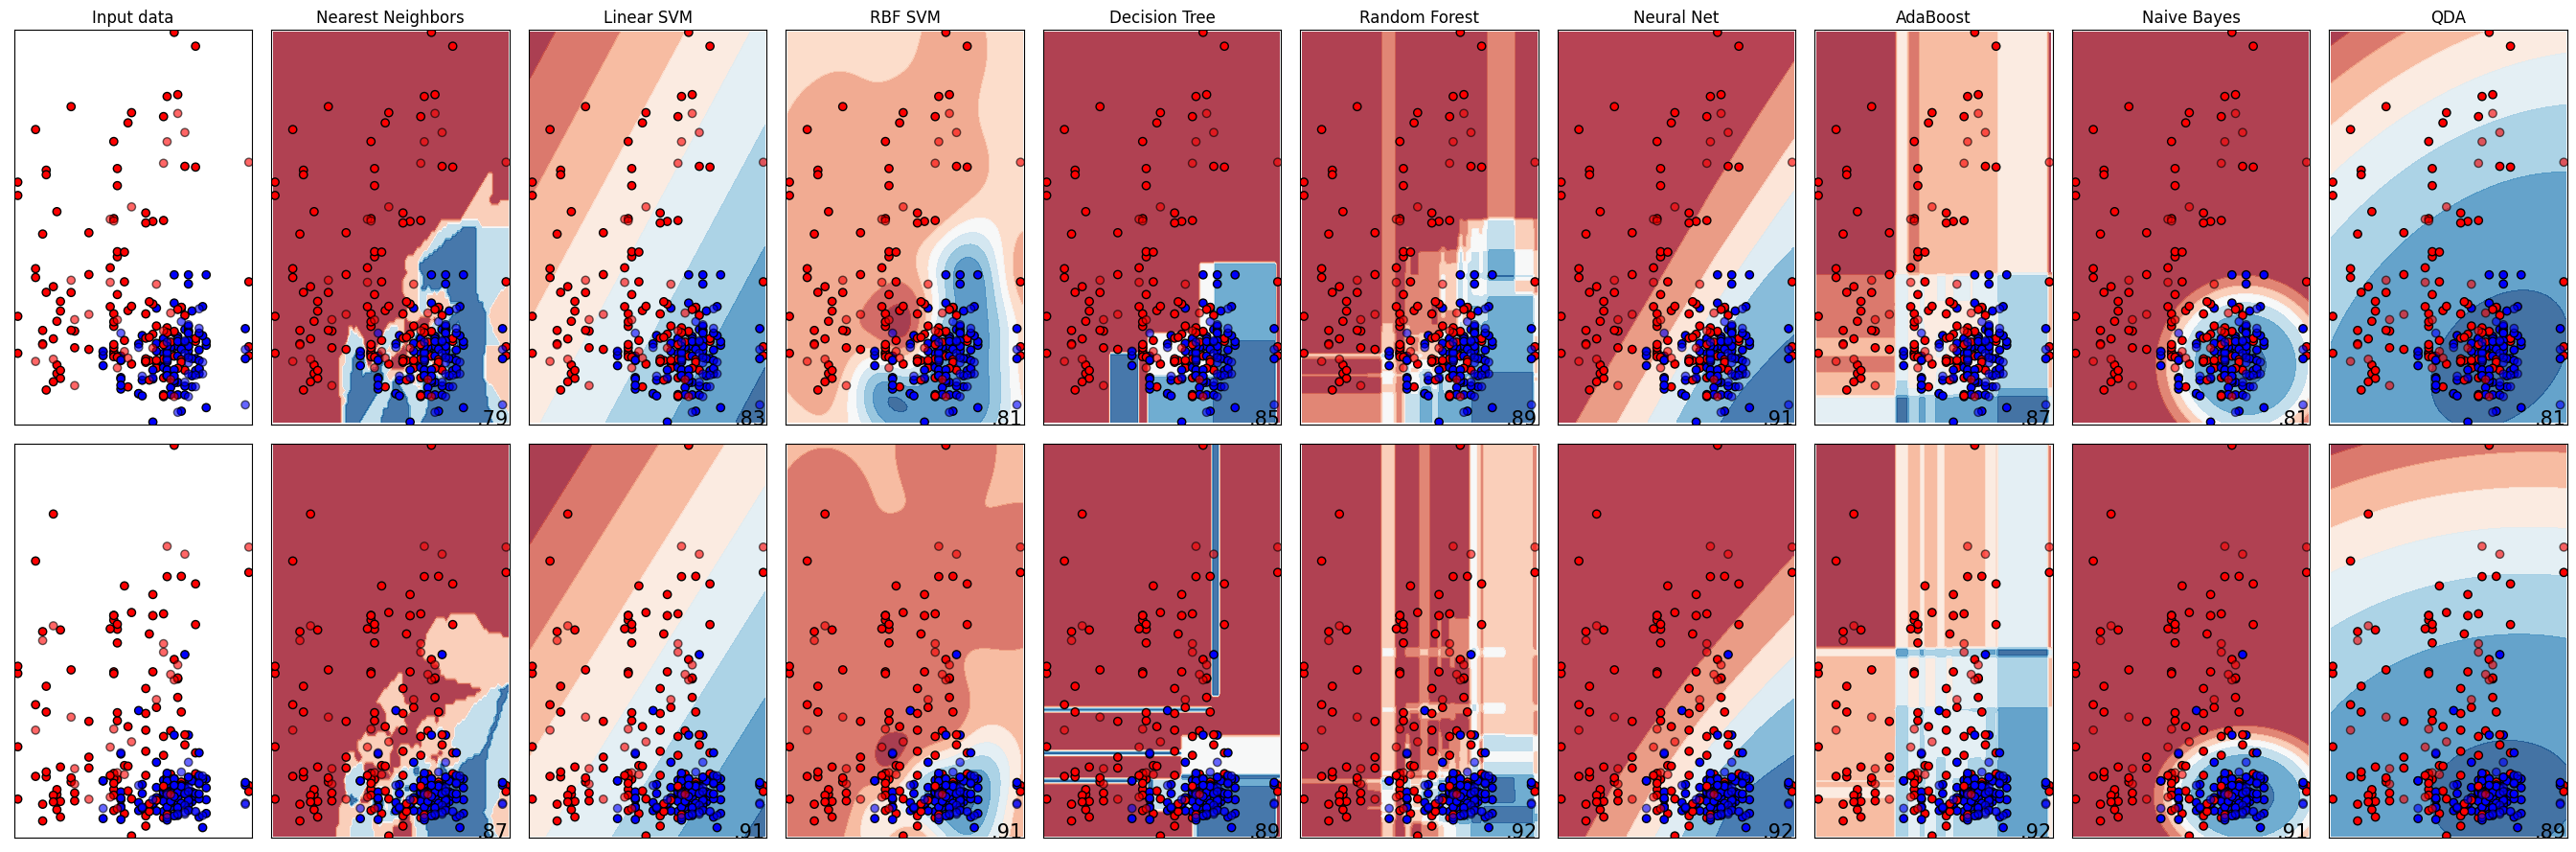

In [30]:

figure = plt.figure(figsize=(27, 9))
i = 1

for ds_cnt, (X, y) in enumerate(datasets):
    
    corr_features = (2, 10)
    
    X = np.concatenate((np.atleast_2d(X[:, corr_features[0]]).T, np.atleast_2d(X[:, corr_features[1]]).T), axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
#     print(X_train.shape, y_train.shape); print(X_test.shape, y_test.shape)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 20, X[:, 1].max() + 20

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        
        score = clf.score(X_test, y_test)
        
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

In [34]:
for i, (X, y) in enumerate(datasets):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
#     print(X_train.shape, y_train.shape); print(X_test.shape, y_test.shape)
    
    if i == 0:
        print("\n\nSPIRAL DATASET")
    else:
        print("\n\nMEANDER DATASET")
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        
        y_pred = clf.predict(X_test)
        
        print(name)
        print(classification_report(y_test, y_pred, target_names=["Control", "Patients"]))
        



SPIRAL DATASET
Nearest Neighbors
              precision    recall  f1-score   support

     Control       0.87      0.77      0.82        26
    Patients       0.80      0.89      0.84        27

    accuracy                           0.83        53
   macro avg       0.83      0.83      0.83        53
weighted avg       0.83      0.83      0.83        53

Linear SVM
              precision    recall  f1-score   support

     Control       0.90      0.69      0.78        26
    Patients       0.76      0.93      0.83        27

    accuracy                           0.81        53
   macro avg       0.83      0.81      0.81        53
weighted avg       0.83      0.81      0.81        53

RBF SVM
              precision    recall  f1-score   support

     Control       0.60      0.96      0.74        26
    Patients       0.91      0.37      0.53        27

    accuracy                           0.66        53
   macro avg       0.75      0.67      0.63        53
weighted avg       0